In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import seaborn as sns
sns.set()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
random.seed(0)

# 1 day prediction

In [2]:
df = pd.read_csv('SJ002_pv_data_10min.csv')
df = df.copy().replace(' ', 0)
df2 = pd.read_csv('SJ002_weather_1day_by_10min_2018_time_revised.csv')
df.head()

,SITE_NO,DATE,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE
0,SJ002,2017-09-01,05:00:00,0.0,0,0,0.0000,0
1,SJ002,2017-09-01,05:10:00,0.0,0,0,0.0000,0
2,SJ002,2017-09-01,05:20:00,0.0,0,0,0.0000,0
3,SJ002,2017-09-01,05:30:00,0.0,0,0,0.0000,0
4,SJ002,2017-09-01,05:40:00,0.0,13.6862,0,0.1185,11.9400


In [4]:
for i, time in enumerate(df['TIME'].iloc[:52000]):
    if i == 0:
        pass
    else: 
        current = int(df['TIME'][i][-8:-6]) * 60 + int(df['TIME'][i][-5:-3])
        previous = int(df['TIME'][i-1][-8:-6]) * 60 + int(df['TIME'][i-1][-5:-3])
        
        if current - previous == 10:
            pass
        else:
            if previous == 1250:
                if current == 1300:
                    pass
                else:
                    df.loc[i-0.5]= df.iloc[i-1,:]
                    df['TIME'].loc[i-0.5] = '21:00:00'
            else:
                pass

for i, time in enumerate(df['TIME'].iloc[:52000]):
    if i == 0:
        pass
    else: 
        current = int(df['TIME'][i][-8:-6]) * 60 + int(df['TIME'][i][-5:-3])
        previous = int(df['TIME'][i-1][-8:-6]) * 60 + int(df['TIME'][i-1][-5:-3])
        
        if current - previous == 10:
            pass
        else:
            if previous == 1300:
                pass
            
            elif current == 310:
                    df.loc[i-0.1]= df.iloc[i,:]
                    df['TIME'].loc[i-0.1] = '05:00:00'
            else:
                pass

/home/cwj/venv/local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df = df.sort_index()

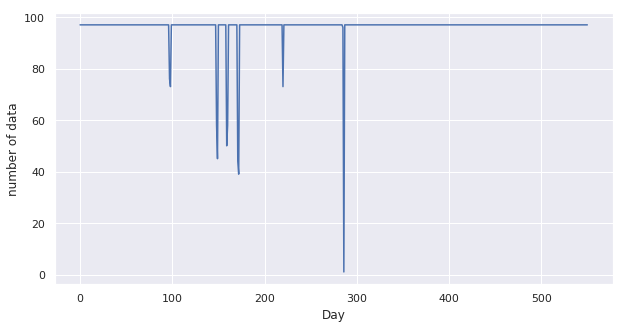

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('DATE').count().iloc[:,0].values)
plt.xlabel('Day')
plt.ylabel('number of data')
plt.show()

In [7]:
group = df.groupby('DATE')
df_full = group.filter(lambda x: x['TIME'].count() == 97)
df_full = df_full.sort_index()

In [8]:
df_full['0'] = (df_full['DATE'].values + str(' ') + df_full['TIME'])

In [9]:
df_full

,SITE_NO,DATE,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,0
0.0,SJ002,2017-09-01,05:00:00,0.0,0,0,0.0000,0,2017-09-01 05:00:00
1.0,SJ002,2017-09-01,05:10:00,0.0,0,0,0.0000,0,2017-09-01 05:10:00
2.0,SJ002,2017-09-01,05:20:00,0.0,0,0,0.0000,0,2017-09-01 05:20:00
3.0,SJ002,2017-09-01,05:30:00,0.0,0,0,0.0000,0,2017-09-01 05:30:00
4.0,SJ002,2017-09-01,05:40:00,0.0,13.6862,0,0.1185,11.9400,2017-09-01 05:40:00
5.0,SJ002,2017-09-01,05:50:00,0.0,13.8017,0,0.0000,11.8287,2017-09-01 05:50:00
6.0,SJ002,2017-09-01,06:00:00,0.0,13.9671,3.8071,0.0000,12.1125,2017-09-01 06:00:00
7.0,SJ002,2017-09-01,06:10:00,0.0,13.9329,8.9088,0.0000,12.4300,2017-09-01 06:10:00
8.0,SJ002,2017-09-01,06:20:00,5.0,14.0250,16.5691,0.0000,12.5450,2017-09-01 06:20:00
9.0,SJ002,2017-09-01,06:30:00,9.0,14.1312,24.2490,0.0000,12.6575,2017-09-01 06:30:00


In [10]:
df2 = df2[(500<=df2['fcsttime'])&(df2['fcsttime']<=2100)]

In [11]:
df2['0'] = 1
for i in range(len(df2)):
    if len(str(df2['fcsttime'].iloc[i]))==3:
        df2['0'].iloc[i]= str(df2['fcstdate'].iloc[i])[:4] + str('-') + str(df2['fcstdate'].iloc[i])[4:6] + str('-') + str(df2['fcstdate'].iloc[i])[6:8] + str(' ') + str('0') + str(df2['fcsttime'].iloc[i])[-3] + str(':') + str(df2['fcsttime'].iloc[i])[-2:] + str(':') + str('00')   
    else:
        df2['0'].iloc[i]= str(df2['fcstdate'].iloc[i])[:4] + str('-') + str(df2['fcstdate'].iloc[i])[4:6] + str('-') + str(df2['fcstdate'].iloc[i])[6:8] + str(' ') + str(df2['fcsttime'].iloc[i])[-4:-2] + str(':') + str(df2['fcsttime'].iloc[i])[-2:] + str(':') + str('00')   
        
df2

/home/cwj/venv/local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,fcstdate,fcsttime,basedate,basetime,POP,PTY,R06,REH,S06,SKY,T3H,WSD,0
30,30,20180102,500,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 05:00:00
31,31,20180102,510,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 05:10:00
32,32,20180102,520,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 05:20:00
33,33,20180102,530,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 05:30:00
34,34,20180102,540,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 05:40:00
35,35,20180102,550,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 05:50:00
36,36,20180102,600,20180101,2300,0,0,0,50,0,1,-3,2.2,2018-01-02 06:00:00
37,37,20180102,610,20180101,2300,0,0,0,35,0,1,-1,1.8,2018-01-02 06:10:00
38,38,20180102,620,20180101,2300,0,0,0,35,0,1,-1,1.8,2018-01-02 06:20:00
39,39,20180102,630,20180101,2300,0,0,0,35,0,1,-1,1.8,2018-01-02 06:30:00


In [12]:
df3 = pd.merge(df_full, df2, on='0')
df3

,SITE_NO,DATE,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,0,Unnamed: 0,...,basedate,basetime,POP,PTY,R06,REH,S06,SKY,T3H,WSD
0,SJ002,2018-01-02,05:00:00,0.00,0,0,0,0,2018-01-02 05:00:00,30,...,20180101,2300,0,0,0,50,0,1,-3,2.2
1,SJ002,2018-01-02,05:10:00,0.00,0,0,0,0,2018-01-02 05:10:00,31,...,20180101,2300,0,0,0,50,0,1,-3,2.2
2,SJ002,2018-01-02,05:20:00,0.00,0,0,0,0,2018-01-02 05:20:00,32,...,20180101,2300,0,0,0,50,0,1,-3,2.2
3,SJ002,2018-01-02,05:30:00,0.00,0,0,0,0,2018-01-02 05:30:00,33,...,20180101,2300,0,0,0,50,0,1,-3,2.2
4,SJ002,2018-01-02,05:40:00,0.00,0,0,0,0,2018-01-02 05:40:00,34,...,20180101,2300,0,0,0,50,0,1,-3,2.2
5,SJ002,2018-01-02,05:50:00,0.00,0,0,0,0,2018-01-02 05:50:00,35,...,20180101,2300,0,0,0,50,0,1,-3,2.2
6,SJ002,2018-01-02,06:00:00,0.00,0,0,0,0,2018-01-02 06:00:00,36,...,20180101,2300,0,0,0,50,0,1,-3,2.2
7,SJ002,2018-01-02,06:10:00,0.00,0,0,0,0,2018-01-02 06:10:00,37,...,20180101,2300,0,0,0,35,0,1,-1,1.8
8,SJ002,2018-01-02,06:20:00,0.00,0,0,0,0,2018-01-02 06:20:00,38,...,20180101,2300,0,0,0,35,0,1,-1,1.8
9,SJ002,2018-01-02,06:30:00,0.00,0,0,0,0,2018-01-02 06:30:00,39,...,20180101,2300,0,0,0,35,0,1,-1,1.8


(15, 30)

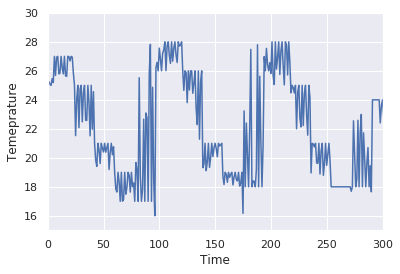

In [31]:
d1 = np.zeros(500)
d1[:] = df3['T3H'][:500]
for i in range(len(d1)):
# for i in range(10):
    if i % 3 ==0:
        pass
    else:
        if df3['T3H'][i] <= df3['T3H'][i+18]:
            d1[i] = np.random.uniform(df3['T3H'][i], df3['T3H'][i+18])
        else:
            d1[i] = np.random.uniform(df3['T3H'][i+18], df3['T3H'][i])
plt.plot(d1)
# plt.plot(df3['T3H'][:500])
plt.xlabel('Time')
plt.ylabel('Temeprature')
plt.xlim([0,300])
plt.ylim([15, 30])

In [14]:
df3 = pd.merge(df_full, df2, on='0')
df3 = df3[['SITE_NO', '0', 'GEN_ENERGY', 'TEMPERATURE', 'SOLAR_IRRADIANCE', 'WIND_SPEED', 'MODULE_TEMPERATURE', 'POP', 'REH', 'SKY', 'T3H','WSD']]
df3.head()

,SITE_NO,0,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,POP,REH,SKY,T3H,WSD
0,SJ002,2018-01-02 05:00:00,0.0,0,0,0,0,0,50,1,-3,2.2
1,SJ002,2018-01-02 05:10:00,0.0,0,0,0,0,0,50,1,-3,2.2
2,SJ002,2018-01-02 05:20:00,0.0,0,0,0,0,0,50,1,-3,2.2
3,SJ002,2018-01-02 05:30:00,0.0,0,0,0,0,0,50,1,-3,2.2
4,SJ002,2018-01-02 05:40:00,0.0,0,0,0,0,0,50,1,-3,2.2


In [15]:
from datetime import date

time_to_num = []
time_to_day = []
for i in range(len(df3)):
    time_to_num.append(int(df3['0'][i][-8:-6]) + int(df3['0'][i][-5:-3])/60)
    year = int(df3['0'][i][:4])
    month = int(df3['0'][i][5:7])
    day = int(df3['0'][i][8:10])
    if year == 2017:
        time_to_day.append((date(year, month, day) - date(2017, 1, 1)).days+1)
    elif year == 2018:
        time_to_day.append((date(year, month, day) - date(2018, 1, 1)).days+1)
    elif year == 2019:
        time_to_day.append((date(year, month, day) - date(2019, 1, 1)).days+1)
        
df3['DATE'] = time_to_day
df3['TIME'] = time_to_num

In [16]:
df3 = df3[['SITE_NO', 'DATE', 'TIME','GEN_ENERGY', '0', 'TEMPERATURE', 'SOLAR_IRRADIANCE', 'WIND_SPEED', 'MODULE_TEMPERATURE', 'POP', 'REH', 'SKY', 'T3H','WSD']]
df3.head()

,SITE_NO,DATE,TIME,GEN_ENERGY,0,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,POP,REH,SKY,T3H,WSD
0,SJ002,2,5.000000,0.0,2018-01-02 05:00:00,0,0,0,0,0,50,1,-3,2.2
1,SJ002,2,5.166667,0.0,2018-01-02 05:10:00,0,0,0,0,0,50,1,-3,2.2
2,SJ002,2,5.333333,0.0,2018-01-02 05:20:00,0,0,0,0,0,50,1,-3,2.2
3,SJ002,2,5.500000,0.0,2018-01-02 05:30:00,0,0,0,0,0,50,1,-3,2.2
4,SJ002,2,5.666667,0.0,2018-01-02 05:40:00,0,0,0,0,0,50,1,-3,2.2


In [17]:
df3.to_csv('SJ002_merge_1day_full.csv', index=False)

In [31]:
from scipy.stats import pearsonr 

for col in df3.columns[3:]:
    print(col)
    print(pearsonr(df3['GEN_ENERGY'].iloc[:8000].values, df3[col].iloc[:8000].values.astype('float')))

GEN_ENERGY
(1.0, 0.0)
TEMPERATURE
(0.48727800423516227, 0.0)
SOLAR_IRRADIANCE
(0.9931062165455589, 0.0)
WIND_SPEED
(0.19061468755453545, 2.4611864675075586e-66)
MODULE_TEMPERATURE
(0.7810901703468935, 0.0)
POP
(-0.18648696515206015, 1.5981423721133223e-63)
REH
(-0.12533634687793688, 2.2366688160670404e-29)
SKY
(-0.1733727133245306, 5.0799717631746044e-55)
T3H
(0.05754690120456662, 2.5963305946231506e-07)
WSD
(0.12054654279896364, 2.7737906739512888e-27)


# 3 hours prediction

In [2]:
df = pd.read_csv('SJ001_pv_data_10min.csv')
df = df.copy().replace(' ', 0)
df2 = pd.read_csv('SJ001_weather_2_hours.csv')
df.head()

,SITE_NO,DATE,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE
0,SJ001,2017-09-01,05:00:00,0.0,0,0,0.2675,0
1,SJ001,2017-09-01,05:10:00,0.0,0,0,0.0720,0
2,SJ001,2017-09-01,05:20:00,0.0,0,0,0.0000,0
3,SJ001,2017-09-01,05:30:00,0.0,0,0,0.0000,0
4,SJ001,2017-09-01,05:40:00,0.0,15.5596,0,0.0000,13.8067


In [3]:
for i, time in enumerate(df['TIME'].iloc[:52000]):
    if i == 0:
        pass
    else: 
        current = int(df['TIME'][i][-8:-6]) * 60 + int(df['TIME'][i][-5:-3])
        previous = int(df['TIME'][i-1][-8:-6]) * 60 + int(df['TIME'][i-1][-5:-3])
        
        if current - previous == 10:
            pass
        else:
            if previous == 1250:
                if current == 1300:
                    pass
                else:
                    df.loc[i-0.5]= df.iloc[i-1,:]
                    df['TIME'].loc[i-0.5] = '21:00:00'
            else:
                pass

for i, time in enumerate(df['TIME'].iloc[:52000]):
    if i == 0:
        pass
    else: 
        current = int(df['TIME'][i][-8:-6]) * 60 + int(df['TIME'][i][-5:-3])
        previous = int(df['TIME'][i-1][-8:-6]) * 60 + int(df['TIME'][i-1][-5:-3])
        
        if current - previous == 10:
            pass
        else:
            if previous == 1300:
                pass
            
            elif current == 310:
                    df.loc[i-0.1]= df.iloc[i,:]
                    df['TIME'].loc[i-0.1] = '05:00:00'
            else:
                pass
df = df.sort_index()

/home/cwj/venv/local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
group = df.groupby('DATE')
df_full = group.filter(lambda x: x['TIME'].count() == 97)
df_full = df_full.sort_index()
df_full['0'] = (df_full['DATE'].values + str(' ') + df_full['TIME'])

In [8]:
df2 = df2[(500<=df2['basetime'])&(df2['basetime']<=2100)]

In [9]:
df2

,Unnamed: 0,basedate,0,basetime,LGT0,LGT1,PTY0,PTY1,REH0,REH1,...,T1H0,T1H1,UUU0,UUU1,VEC0,VEC1,VVV0,VVV1,WSD0,WSD1
30,30,20170901,2017-09-01 05:00:00,500,NaN,NaN,0.0,0.0,38.0,35.0,...,27.400000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.2
31,31,20170901,2017-09-01 05:10:00,510,NaN,NaN,0.0,0.0,38.0,35.0,...,27.400000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.2
32,32,20170901,2017-09-01 05:20:00,520,NaN,NaN,0.0,0.0,38.0,35.0,...,27.400000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.2
33,33,20170901,2017-09-01 05:30:00,530,NaN,NaN,0.0,0.0,35.0,37.0,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
34,34,20170901,2017-09-01 05:40:00,540,NaN,NaN,0.0,0.0,35.0,37.0,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
35,35,20170901,2017-09-01 05:50:00,550,NaN,NaN,0.0,0.0,35.0,37.0,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
36,36,20170901,2017-09-01 06:00:00,600,NaN,NaN,0.0,0.0,35.0,37.0,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
37,37,20170901,2017-09-01 06:10:00,610,NaN,NaN,0.0,0.0,35.0,37.0,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
38,38,20170901,2017-09-01 06:20:00,620,NaN,NaN,0.0,0.0,35.0,37.0,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
39,39,20170901,2017-09-01 06:30:00,630,NaN,NaN,0.0,0.0,37.0,39.0,...,27.100000,26.100000,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.0


In [10]:
df3 = pd.merge(df_full, df2, on='0')
df3

,SITE_NO,DATE,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,0,Unnamed: 0,...,T1H0,T1H1,UUU0,UUU1,VEC0,VEC1,VVV0,VVV1,WSD0,WSD1
0,SJ001,2017-09-01,05:00:00,0.0,0,0,0.2675,0,2017-09-01 05:00:00,30,...,27.400000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.2
1,SJ001,2017-09-01,05:10:00,0.0,0,0,0.0720,0,2017-09-01 05:10:00,31,...,27.400000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.2
2,SJ001,2017-09-01,05:20:00,0.0,0,0,0.0000,0,2017-09-01 05:20:00,32,...,27.400000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.2
3,SJ001,2017-09-01,05:30:00,0.0,0,0,0.0000,0,2017-09-01 05:30:00,33,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
4,SJ001,2017-09-01,05:40:00,0.0,15.5596,0,0.0000,13.8067,2017-09-01 05:40:00,34,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
5,SJ001,2017-09-01,05:50:00,0.0,15.8846,0,0.0000,14.4667,2017-09-01 05:50:00,35,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
6,SJ001,2017-09-01,06:00:00,0.0,15.8233,0,0.0000,14.8812,2017-09-01 06:00:00,36,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
7,SJ001,2017-09-01,06:10:00,0.0,16.0275,14.0542,0.0000,14.8938,2017-09-01 06:10:00,37,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
8,SJ001,2017-09-01,06:20:00,3.0,16.2921,39.7109,0.0000,15.1279,2017-09-01 06:20:00,38,...,28.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.7
9,SJ001,2017-09-01,06:30:00,28.0,15.7758,98.2302,0.0000,15.1000,2017-09-01 06:30:00,39,...,27.100000,26.100000,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.0


In [11]:
df3.columns

Index(['SITE_NO', 'DATE', 'TIME', 'GEN_ENERGY', 'TEMPERATURE',
       'SOLAR_IRRADIANCE', 'WIND_SPEED', 'MODULE_TEMPERATURE', '0',
       'Unnamed: 0', 'basedate', 'basetime', 'LGT0', 'LGT1', 'PTY0', 'PTY1',
       'REH0', 'REH1', 'RN10', 'RN11', 'SKY0', 'SKY1', 'T1H0', 'T1H1', 'UUU0',
       'UUU1', 'VEC0', 'VEC1', 'VVV0', 'VVV1', 'WSD0', 'WSD1'],
      dtype='object')

In [15]:
df3 = pd.merge(df_full, df2, on='0')
df3 = df3[['SITE_NO', '0', 'GEN_ENERGY', 'PTY0', 'REH0', 'RN10', 'SKY0', 'T1H0','WSD0']]
from datetime import date

time_to_num = []
time_to_day = []
for i in range(len(df3)):
    time_to_num.append(int(df3['0'][i][-8:-6]) + int(df3['0'][i][-5:-3])/60)
    year = int(df3['0'][i][:4])
    month = int(df3['0'][i][5:7])
    day = int(df3['0'][i][8:10])
    if year == 2017:
        time_to_day.append((date(year, month, day) - date(2017, 1, 1)).days+1)
    elif year == 2018:
        time_to_day.append((date(year, month, day) - date(2018, 1, 1)).days+1)
    elif year == 2019:
        time_to_day.append((date(year, month, day) - date(2019, 1, 1)).days+1)
        
df3['DATE'] = time_to_day
df3['TIME'] = time_to_num

df3 = df3[['SITE_NO', 'DATE', 'TIME','GEN_ENERGY','PTY0', 'REH0', 'RN10', 'SKY0', 'T1H0','WSD0']]
df3.head()

,SITE_NO,DATE,TIME,GEN_ENERGY,PTY0,REH0,RN10,SKY0,T1H0,WSD0
0,SJ001,244,5.000000,0.0,0.0,38.0,0.0,1.0,27.4,1.1
1,SJ001,244,5.166667,0.0,0.0,38.0,0.0,1.0,27.4,1.1
2,SJ001,244,5.333333,0.0,0.0,38.0,0.0,1.0,27.4,1.1
3,SJ001,244,5.500000,0.0,0.0,35.0,0.0,1.0,28.0,1.2
4,SJ001,244,5.666667,0.0,0.0,35.0,0.0,1.0,28.0,1.2


In [16]:
df3.to_csv('SJ001_merge_3hour_full.csv', index=False)